Importing Necessary Libraries:

In [8]:
import pandas as pd
import numpy as np
from IPython.display import display
import visuals as vs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Dataset:

In [4]:
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Dataset might be missing")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6)
memory usage: 20.7 KB


In [6]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples

To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail.

In [10]:
indices = [25,50,75]

samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16165,4230,7595,201,4003,57
1,6269,1095,1980,3860,609,2162
2,20398,1137,3,4407,3,975


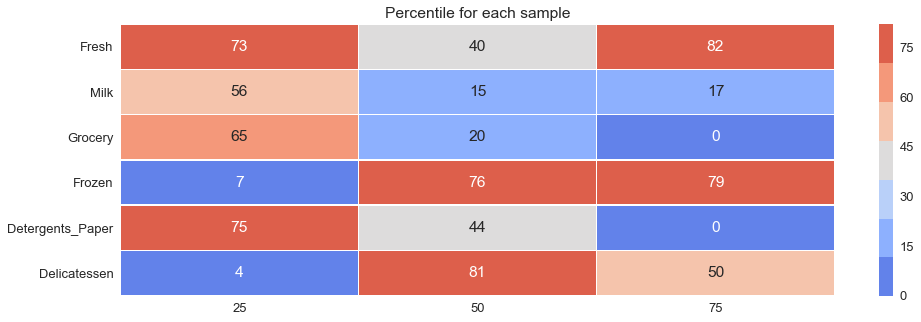

In [11]:
plt.figure(figsize=(16,5))
sns.set(font_scale = 1.3)
plt.title("Percentile for each sample")
pct = (data.rank(pct=True).loc[indices]*100).astype(int)
sns.heatmap(pct.transpose(), linewidth = 0.5, cmap=sns.color_palette("coolwarm", 7), annot = True)
plt.show()

### Customer Index : 25 (Index 0)
* Major Spending: Fresh, DetergentS_Paper (Based on "HeatMap" & "> mean_value")
* Medium Spending: Milk, Grocery (Based on "HeatMap" & "Around mean_value")
* Minor Spending: Frozen, Delicatessen (Based on "HeatMap" & "< mean_value")
* **Conclusion: Small Retail Store.**

### Customer Index : 50 (Index 1)
* Major Spending: Frozen, Delicatessen (Based on "HeatMap" & "> mean_value")
* Medium Spending: Fresh, Detergents_Paper (Based on "HeatMap" & "Around mean_value")
* Minor Spending: Milk, Grocery (Based on "HeatMap" & "< mean_value")
* **Conclusion: Resturent**

### Customer Index : 75 (Index 2)
* Major Spending: Frozen, Fresh (Based on "HeatMap" & "> mean_value")
* Medium Spending: Delicatessen (Based on "HeatMap" & "Around mean_value")
* Minor Spending: Milk, Grocery, Detergents_Paper (Based on "HeatMap" & "< mean_value")
* **Conclusion: Supplier (with Small Resturent Business) / Supermarket (with attached Small Resturent)